### Data Loading and Preprocessing

In [2]:
from stock_3.load_prep_viz import (
    parse_and_normalize_data,
    create_sequences_multivariate,
    split_data
)


# File path to the dataset
data_path = 'data/MSFT.csv'

# Parameters
lookback = 75

# Parse and normalize data
scaled_data = parse_and_normalize_data(data_path)

# Create sequences for features and targets
X, y = create_sequences_multivariate(scaled_data, lookback)

# Split into train, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# Print data shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6432, 75, 7), y_train shape: (6432, 7)
X_val shape: (1378, 75, 7), y_val shape: (1378, 7)
X_test shape: (1379, 75, 7), y_test shape: (1379, 7)


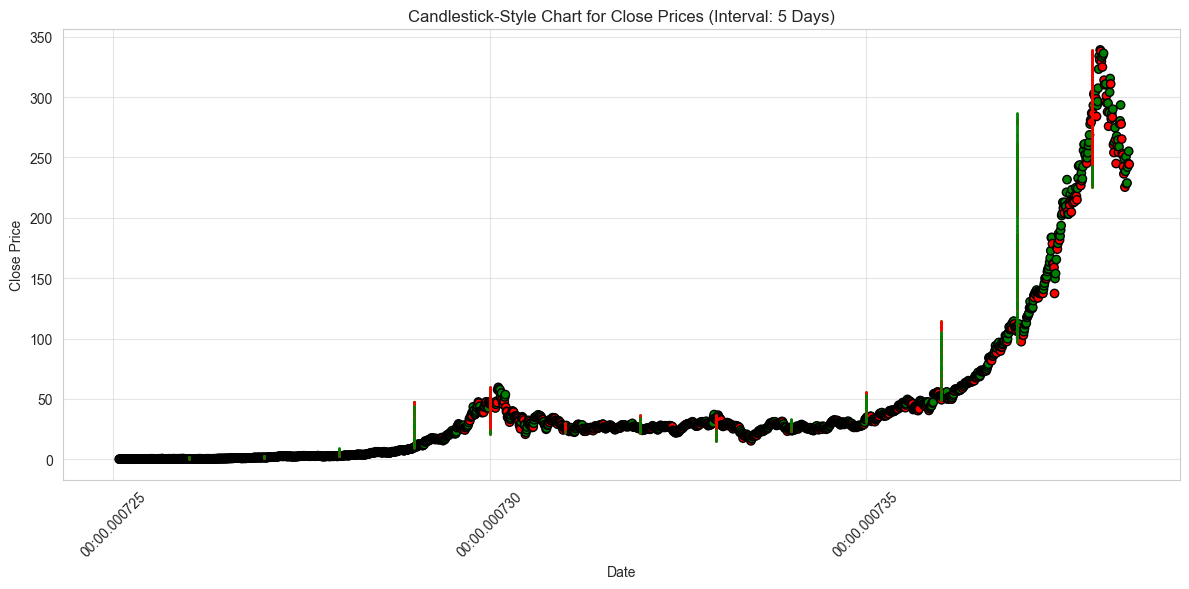

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from stock_3.load_prep_viz import plot_candlestick_close_intermittent

plot_candlestick_close_intermittent(
    data=df,
    date_col='Date',
    close_col='Close',
    interval=5  # Adjust the interval as needed
)

### Simple RNN

In [3]:
from stock_3.models_and_eval import build_simple_rnn_model

input_shape = X_train.shape[1:]
output_dim = y_train.shape[-1]

# Build the SimpleRNN model
simple_rnn_model = build_simple_rnn_model(input_shape=input_shape, output_dim=output_dim)

# Display model summary
simple_rnn_model.summary()

# Train the SimpleRNN model
history_simple_rnn = simple_rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,063 (19.78 KB)

 Trainable params: 5,063 (19.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6900e-04 - mse: 3.6900e-04 - val_loss: 8.6687e-04 - val_mse: 8.6687e-04
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2992e-04 - mse: 2.2992e-04 - val_loss: 6.7467e-04 - val_mse: 6.7467e-04
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8149e-04 - mse: 1.8149e-04 - val_loss: 4.0206e-04 - val_mse: 4.0206e-04
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9134e-04 - mse: 1.9134e-04 - val_loss: 3.1407e-04 - val_mse: 3.1407e-04
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9597e-04 - mse: 1.9597e-04 - val_loss: 2.6650e-04 - val_mse: 2.6650e-04
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4335e-04 - mse: 1.4335e-04 - val_loss: 2.1835e-04 - val_mse: 2.1835e-04
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9481e-04 - mse: 

### BiDirectional LSTM

In [4]:
from stock_3.models_and_eval import build_bi_lstm_model

# Build the model
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
output_dim = X_train.shape[2]  # Number of output columns
bi_lstm_model = build_bi_lstm_model(input_shape=input_shape, output_dim=output_dim)

# Display model summary
bi_lstm_model.summary()

# Train the model
history_bi_lstm = bi_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,767 (147.53 KB)

 Trainable params: 37,767 (147.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 2.8012e-04 - val_mse: 2.8012e-04
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.0679e-04 - mse: 2.0679e-04 - val_loss: 1.2431e-04 - val_mse: 1.2431e-04
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.6705e-04 - mse: 1.6705e-04 - val_loss: 9.3104e-05 - val_mse: 9.3104e-05
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.7429e-04 - mse: 1.7429e-04 - val_loss: 9.2096e-05 - val_mse: 9.2096e-05
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.7161e-04 - mse: 1.7161e-04 - val_loss: 2.1597e-04 - val_mse: 2.1597e-04
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.7365e-04 - mse: 1.7365e-04 - val_loss: 7.7295e-05 - val_mse: 7.7295e-05
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.6826e-04 - mse: 1.6826e-04 - val_loss: 1.0993e-04 - val_mse: 1.0993e-04
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.

#### Learning Curves for Bi-LSTM

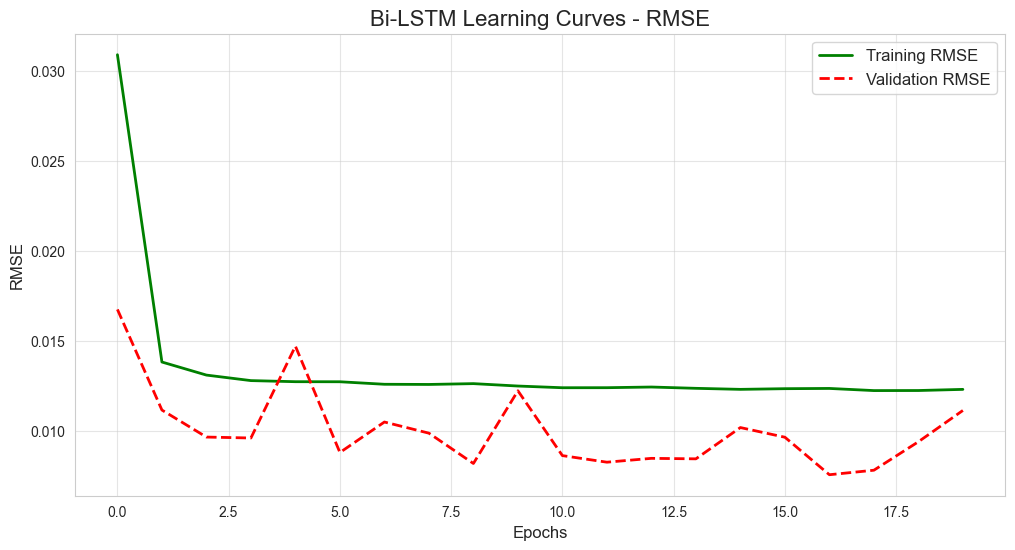

In [5]:
from stock_3.load_prep_viz import plot_rmse_learning_curves

# Plot RMSE learning curves for the Bi-LSTM model
plot_rmse_learning_curves(history_bi_lstm, title='Bi-LSTM Learning Curves - RMSE')

### Conv1D Model

In [ ]:
from stock_3.models_and_eval import build_conv1d_model
import seaborn as sns
import numpy as np

# Build the Conv1D model
conv1d_model = build_conv1d_model(input_shape=input_shape, output_dim=output_dim)

# Display model summary
conv1d_model.summary()

# Train the Conv1D model
history_conv1d = conv1d_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


#### Learning Curves for Conv1D

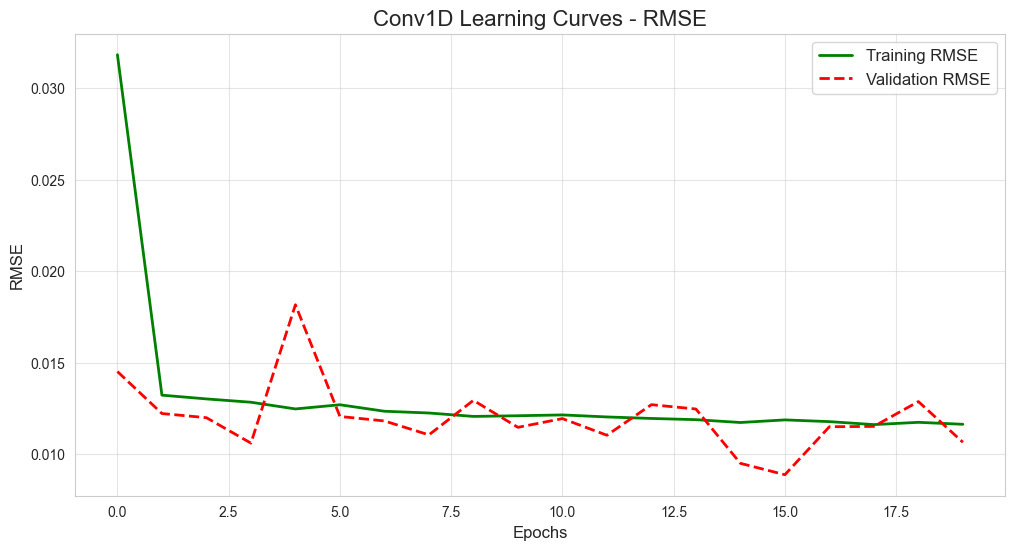

In [15]:
# Plot RMSE learning curves for Conv1D
plot_rmse_learning_curves(history_conv1d, title='Conv1D Learning Curves - RMSE')

### Final Evaluation on Test Set
**RMSE-to-Mean Feature Value Ratio**

In [13]:
from stock_3.models_and_eval import calculate_rmse_ratios

# Calculate RMSE ratios for all models
conv1d_rmse_ratios = calculate_rmse_ratios(conv1d_model, X_test, y_test)
bilstm_rmse_ratios = calculate_rmse_ratios(bi_lstm_model, X_test, y_test)
simplernn_rmse_ratios = calculate_rmse_ratios(simple_rnn_model, X_test, y_test)

# Create a DataFrame to compare the RMSE ratios
comparison_df = pd.DataFrame({
    'Attribute': df.columns,
    'Conv1D RMSE Ratio': conv1d_rmse_ratios,
    'Bi-LSTM RMSE Ratio': bilstm_rmse_ratios,
    'SimpleRNN RMSE Ratio': simplernn_rmse_ratios
})

comparison_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Attribute,Conv1D RMSE Ratio,Bi-LSTM RMSE Ratio,SimpleRNN RMSE Ratio
0,Date,0.070404,0.026657,0.031209
1,Low,0.057744,0.081880,0.044030
2,Open,0.026783,0.055487,0.085206
3,Volume,3.521169,0.900156,1.957311
4,High,0.118797,0.027590,0.143538
5,Close,0.093024,0.043912,0.112273
6,Adjusted Close,0.343322,0.158203,0.313520


**Mean Squared Error**

In [12]:
from sklearn.metrics import mean_squared_error

# Evaluate Conv1D model on the test set
conv1d_test_predictions = conv1d_model.predict(X_test)
conv1d_rmse_test = np.sqrt(mean_squared_error(y_test, conv1d_test_predictions))
conv1d_mse_test = mean_squared_error(y_test, conv1d_test_predictions)

# Evaluate Bi-LSTM model on the test set
bilstm_test_predictions = bi_lstm_model.predict(X_test)
bilstm_rmse_test = np.sqrt(mean_squared_error(y_test, bilstm_test_predictions))
bilstm_mse_test = mean_squared_error(y_test, bilstm_test_predictions)

# Evaluate SimpleRNN model on the test set
simplernn_test_predictions = simple_rnn_model.predict(X_test)
simplernn_rmse_test = np.sqrt(mean_squared_error(y_test, simplernn_test_predictions))
simplernn_mse_test = mean_squared_error(y_test, simplernn_test_predictions)

# Create a DataFrame to display the final test evaluation
test_evaluation_df = pd.DataFrame({
    'Model': ['SimpleRNN', 'Conv1D', 'Bi-LSTM'],
    'Test RMSE': [simplernn_rmse_test, conv1d_rmse_test, bilstm_rmse_test],
    'Test MSE': [simplernn_mse_test, conv1d_mse_test, bilstm_mse_test]
})

test_evaluation_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Model,Test RMSE,Test MSE
0,SimpleRNN,0.077746,0.006044
1,Conv1D,0.086728,0.007522
2,Bi-LSTM,0.040563,0.001645


**Final Model Comparison**

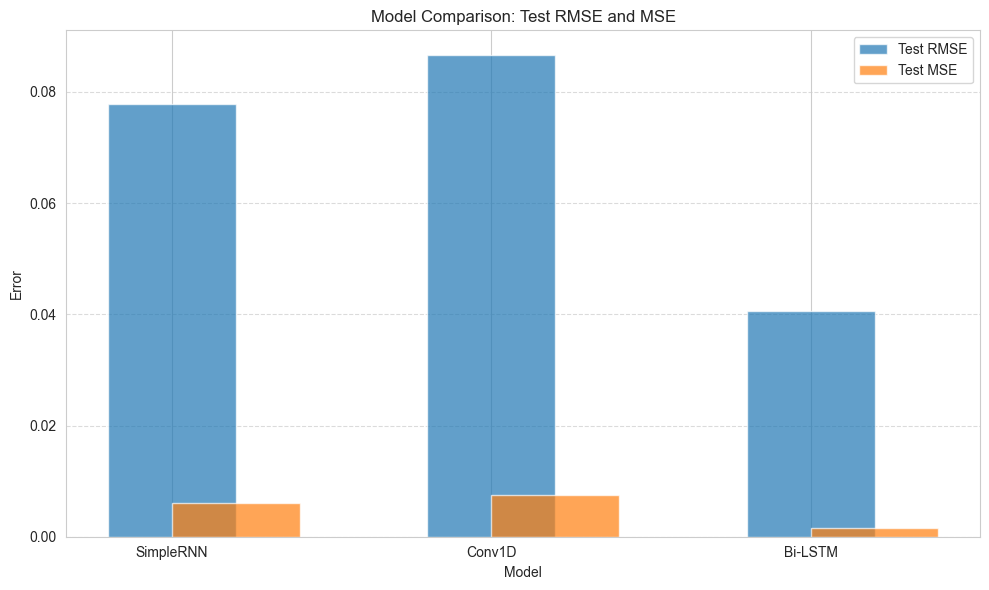

In [14]:
import matplotlib.pyplot as plt
from stock_3.load_prep_viz import plot_model_comparison

# Example usage:
# Provide the RMSE and MSE values for each model
models = ['SimpleRNN', 'Conv1D', 'Bi-LSTM']
rmse_values = [simplernn_rmse_test, conv1d_rmse_test, bilstm_rmse_test]
mse_values = [simplernn_mse_test, conv1d_mse_test, bilstm_mse_test]

# Call the function to plot the comparison
plot_model_comparison(models, rmse_values, mse_values)